In [1]:
import os
os.getcwd()

'/home/kmm537/XTEC_notebooks/PdxRTe3/Nov_2023_Nat_Phys/Nat_Phys_Resub/Satellite_Asymmetry/Diffuse_diamond_Asymmetry'

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import h5py
from scipy import ndimage
from collections import defaultdict


# Read temperatures

In [3]:
import os

arr = os.listdir('/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/')

import regex as re
match_str='_0x0_(.*?)K'

Tlist=np.sort([int(re.findall(match_str,i)[0]) for i in arr if re.findall(match_str,i)!=[] ])

Tlist=Tlist[0:-1]
num_T=len(Tlist)

print(Tlist)

[ 30  50  85 115 135 150 160 170 180 190 200 215 230 240 250 260 270 280
 290]


# read all data

In [4]:
import dask
import dask.array as da

from dask.distributed import Client
import sparse

from dask_image.ndfilters import gaussian_filter

In [5]:
client=Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 150.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45235,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 150.00 GiB
Comm: tcp://127.0.0.1:35287,Total threads: 1
Dashboard: http://127.0.0.1:42953/status,Memory: 37.50 GiB
Nanny: tcp://127.0.0.1:33971,


In [6]:
DIR = '/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_'
filepaths = [DIR + str(T) + 'K.nxs' for T in Tlist]
full_data=[]
for file in filepaths:
    print(file)
    doc = h5py.File(file,'r')

    data_t = da.from_array(doc['entry/transform/data/'],chunks=(1001,1001,1001))
    
    Qh_full=np.array(doc['entry/transform/Qh'])
    Qk_full=np.array(doc['entry/transform/Qk'])
    Ql_full=np.array(doc['entry/transform/Ql'])

    full_data.append(data_t)
    

/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_30K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_50K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_85K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_115K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_135K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_150K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_160K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_170K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_180K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_190K.nxs
/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0

In [7]:
full_data=da.array(full_data)

In [8]:
full_data

dask.array<stack, shape=(19, 1001, 1001, 1001), dtype=float32, chunksize=(1, 1001, 1001, 1001), chunktype=numpy.ndarray>

In [16]:
sig=(0,0,0,0)
#smooth_I=gaussian_filter(full_data, sigma=sig)
#smooth_I

In [11]:
Qk_ind=slice(300,701)
print(Qk_full[Qk_ind])


[-20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1 -19.  -18.9
 -18.8 -18.7 -18.6 -18.5 -18.4 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7
 -17.6 -17.5 -17.4 -17.3 -17.2 -17.1 -17.  -16.9 -16.8 -16.7 -16.6 -16.5
 -16.4 -16.3 -16.2 -16.1 -16.  -15.9 -15.8 -15.7 -15.6 -15.5 -15.4 -15.3
 -15.2 -15.1 -15.  -14.9 -14.8 -14.7 -14.6 -14.5 -14.4 -14.3 -14.2 -14.1
 -14.  -13.9 -13.8 -13.7 -13.6 -13.5 -13.4 -13.3 -13.2 -13.1 -13.  -12.9
 -12.8 -12.7 -12.6 -12.5 -12.4 -12.3 -12.2 -12.1 -12.  -11.9 -11.8 -11.7
 -11.6 -11.5 -11.4 -11.3 -11.2 -11.1 -11.  -10.9 -10.8 -10.7 -10.6 -10.5
 -10.4 -10.3 -10.2 -10.1 -10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3
  -9.2  -9.1  -9.   -8.9  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1
  -8.   -7.9  -7.8  -7.7  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9
  -6.8  -6.7  -6.6  -6.5  -6.4  -6.3  -6.2  -6.1  -6.   -5.9  -5.8  -5.7
  -5.6  -5.5  -5.4  -5.3  -5.2  -5.1  -5.   -4.9  -4.8  -4.7  -4.6  -4.5
  -4.4  -4.3  -4.2  -4.1  -4.   -3.9  -3.8  -3.7  -

In [13]:
I_avg=da.mean(full_data[:,:,Qk_ind,:],axis=2)


In [14]:
I_avg

dask.array<mean_agg-aggregate, shape=(19, 1001, 1001), dtype=float32, chunksize=(1, 1001, 1001), chunktype=numpy.ndarray>

In [ ]:
I_avg=I_avg.compute()

In [17]:
import pickle

obj = {}
obj['I_avg'] = I_avg
obj['sigma']= sig
pickle.dump( obj, open( "0x0A_full_K_m20_p20_avg_I.p", "wb" ) )

In [18]:
client.shutdown()

# 1. Diffuse asymmetry

In [4]:
import pickle
obj=pickle.load( open("0x0A_full_K_m20_p20_avg_I.p", "rb" ) )
I0=obj['I_avg']
I0 = np.transpose(I0,[0,2,1])
print(obj['sigma'])

(0, 0, 0, 0)


In [5]:
file = '/share/kim/STEM_Xray_data/xray_from_Josh_Straquadine/PdxErTe3_0x0/b5669/PdxErTe3_0x0_30K.nxs'
doc = h5py.File(file,'r')
Qh=np.array(doc['entry/transform/Qh'])
Ql=np.array(doc['entry/transform/Ql'])


In [6]:
nT=len(Tlist)
nH=len(Qh)
nL=len(Ql)

mask_region=np.zeros((nH,nL),dtype='int')
#mask_region=np.ones((nH,nL),dtype='int')

mask_region[426:625,650:925]=1


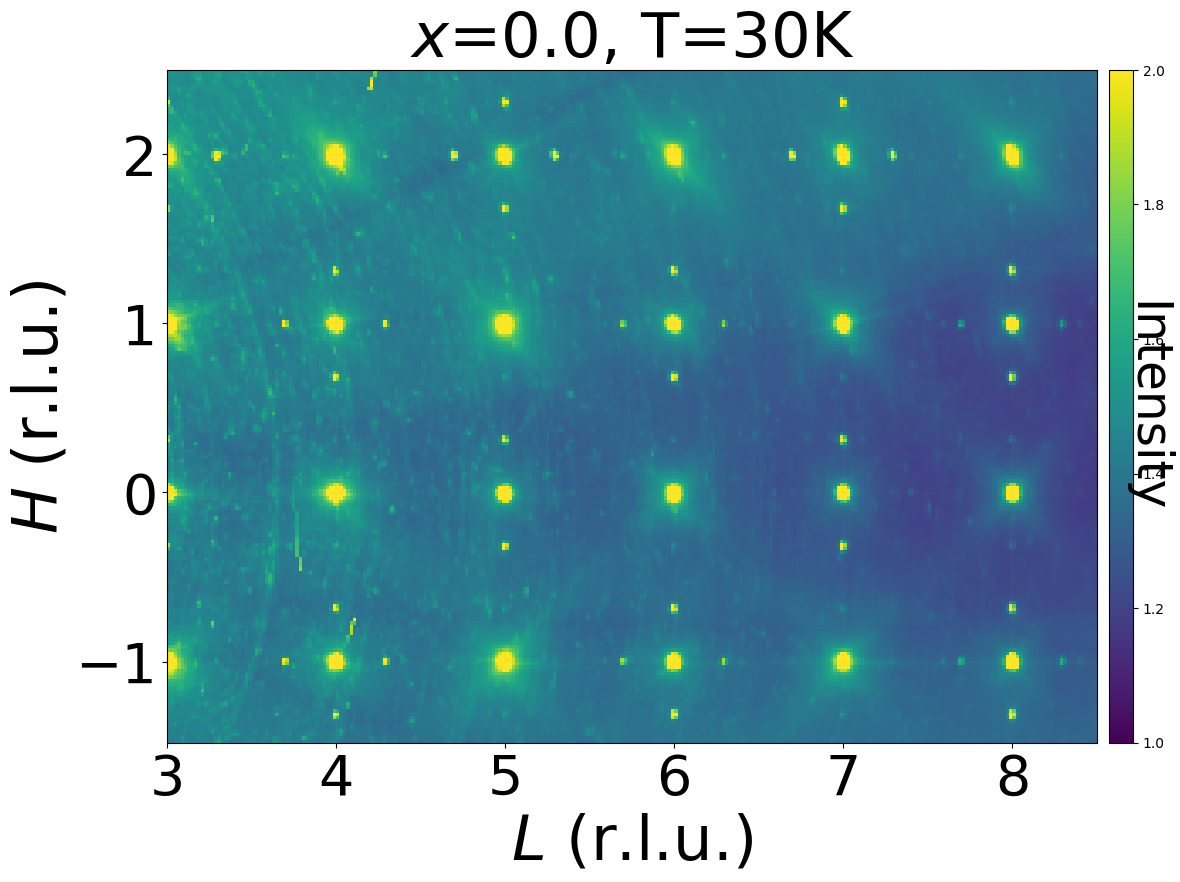

In [8]:
iT=0
plot_slice=np.log10(1+I0[iT])


vmx=2
vmn=1


fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1)

im=plt.imshow(plot_slice[426:625,650:925],origin='lower',extent=[Ql[650], Ql[925],Qh[426], Qh[625]],vmax=vmx,vmin=vmn)
plt.grid(color='#999999', linestyle='-', alpha=0.05)


plt.ylabel("$H$ (r.l.u.)",size=45)
plt.xlabel("$L$ (r.l.u.)",size=45)
plt.yticks( fontsize=40)
plt.xticks( fontsize=40)

plt.yticks(np.arange(-1, 2.5, 1), fontsize=40)
plt.xticks(np.arange(3, 8.5, 1), fontsize=40)

plt.title(r'$x$=0.0, T='+ str(Tlist[0])+'K',size=45)

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar=plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
#cbar=plt.colorbar()
#cbar.ax.set_yticklabels([r'$10^1$','','','','','$10^2$ '],size=35)  # vertically oriented colorbar
cbar.set_label('Intensity', rotation=270,size=35)


# Diamond mask

In [8]:
mask_stripes = np.ones((nH,nL),dtype='int') # for K=odd plane 
delta=2

for i in np.where(Qh%1==0)[0]:
    q_min=max(i-delta,0)
    q_max=min(i+delta+1,nH)
    mask_stripes[q_min:q_max,:]=0

for i in np.where(Ql%1==0)[0]:
    q_min=max(i-delta,0)
    q_max=min(i+delta+1,nL)
    mask_stripes[:,q_min:q_max]=0
    
    

In [9]:
def Diamond_mask(rin=13,rout=17):
    mask = np.zeros(I0.shape[1:3],dtype='int')
    mask_NE=mask.copy()
    mask_NW=mask.copy()
    mask_SE=mask.copy()
    mask_SW=mask.copy()
    




    single_zone_mask = np.zeros((101,101),dtype='int')
    single_zone_mask_NE = single_zone_mask.copy()
    single_zone_mask_NW = single_zone_mask.copy()
    single_zone_mask_SE = single_zone_mask.copy()
    single_zone_mask_SW = single_zone_mask.copy()
    
    xc,yc = (50,50)
    for (x,y) in np.ndindex((101,101)):
        if max(0,rin-abs(y-yc)) <= abs(x-xc) <= max(-1,rout-abs(y-yc)):
            
            single_zone_mask[x,y] = 1
            if x>xc and y>yc:
                single_zone_mask_NE[x,y] = 1
            if x>xc and y<yc:
                single_zone_mask_NW[x,y] = 1
            if x<xc and y>yc:
                single_zone_mask_SE[x,y] = 1
            if x<xc and y<yc:
                single_zone_mask_SW[x,y] = 1
                
    diamond_count=0
    for center_row in range(50,mask.shape[0]-50,50):
        for center_col in range(50,mask.shape[1]-50,50):
            if(center_row+center_col)%100 == 0: continue
            diamond_count=diamond_count+1

            mask[center_row-50:center_row+51,center_col-50:center_col+51] += single_zone_mask*diamond_count
            mask_NE[center_row-50:center_row+51,center_col-50:center_col+51] += single_zone_mask_NE*diamond_count
            mask_NW[center_row-50:center_row+51,center_col-50:center_col+51] += single_zone_mask_NW*diamond_count
            mask_SE[center_row-50:center_row+51,center_col-50:center_col+51] += single_zone_mask_SE*diamond_count
            mask_SW[center_row-50:center_row+51,center_col-50:center_col+51] += single_zone_mask_SW*diamond_count
            
            
    return (mask, mask_NE,mask_NW, mask_SE,mask_SW,diamond_count)
    

In [10]:
rin=12
rout=18

In [11]:
diamond_label,label_NE, label_NW, label_SE,label_SW,diamond_count =Diamond_mask(rin,rout)
#diamond_label,label_NE, label_NW, label_SE,label_SW,diamond_count =Diamond_mask(rin=14,rout=15)

In [12]:
asym_NW_SE=[]
asym_NE_SW=[]

I_diffuse=I0*mask_stripes

I_select=I0*mask_region

for label in range(1,diamond_count+1):
    
    inds=np.where(diamond_label==label)
    I_diamond=I_select[:, inds[0],inds[1]]

    if(np.min(I_diamond)<1e-6):
        continue
    
    
    inds=np.where(label_NE==label)
    I_diag=I_diffuse[:,inds[0],inds[1]]
    NE_mean=np.mean(I_diag,axis=1)
    

    inds=np.where(label_NW==label)
    I_diag=I_diffuse[:,inds[0],inds[1]]
    NW_mean=np.mean(I_diag,axis=1)
    
    inds=np.where(label_SE==label)
    I_diag=I_diffuse[:,inds[0],inds[1]]
    SE_mean=np.mean(I_diag,axis=1)
    
    inds=np.where(label_SW==label)
    I_diag=I_diffuse[:,inds[0],inds[1]]
    SW_mean=np.mean(I_diag,axis=1)
    
    
    a_NW_SE=np.abs(NW_mean-SE_mean)/((NW_mean+SE_mean))
    a_NW_SE[(NW_mean<=0)|(SE_mean<=0)] = None
    asym_NW_SE.append(a_NW_SE)

    
    
    a_NE_SW=(NE_mean-SW_mean)/((NE_mean+SW_mean))
    a_NE_SW[(NE_mean<=0)|(SW_mean<=0)] = None
    asym_NE_SW.append(a_NE_SW)

asym=np.vstack([asym_NE_SW,asym_NW_SE])
asym_mean=np.mean(asym, axis=0)
asym_std=np.std(asym,axis=0)

asym_NE_SW=np.array(asym_NE_SW)
asym_NE_SW_mean=np.mean(asym_NE_SW,axis=0)
asym_NE_SW_std=np.mean(asym_NE_SW,axis=0)


asym_NW_SE=np.array(asym_NW_SE)
asym_NW_SE_mean=np.mean(asym_NW_SE,axis=0)
asym_NW_SE_std=np.std(asym_NW_SE,axis=0)


In [15]:
asym_NW_SE.shape

(10, 19)

# save asymmetry results for combined plots

In [16]:
obj={}
obj['Temp']=Tlist
obj['asym_NE_SW'] = asym_NE_SW
obj['asym_NW_SE'] = asym_NW_SE

obj['rin,rout,delta']= (rin,rout,delta)


In [17]:
import pickle


pickle.dump( obj, open( "0x0A_diamond_asymmetry.p", "wb" ) )

# Line cut

In [9]:
iT=0
slice_H=slice(549,552)

slice_L=slice(675,725)


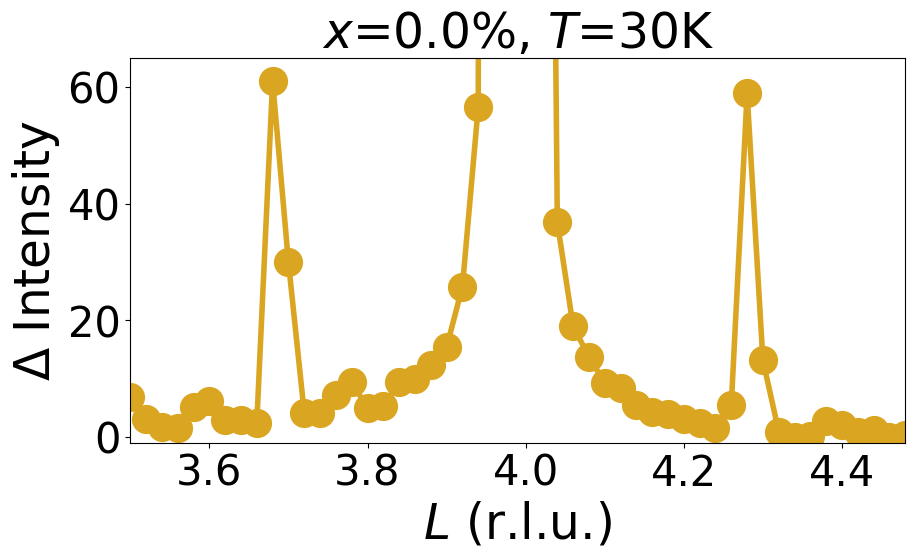

In [11]:
Linecut_I=I0[iT,slice_H,slice_L]

Intensity_line=np.mean(Linecut_I,axis=0)
Intensity_line=Intensity_line-np.min(Intensity_line)

fig=plt.figure(figsize=(10,5))

plt.plot(Ql[slice_L],Intensity_line, linestyle='-',lw=4,color='goldenrod',marker='o',markersize=20,label='T=30K');

#plt.yscale('log')




#plt.xlim()
plt.ylim([-1,65])
plt.xlim([Ql[slice_L][0], Ql[slice_L][-1]])
plt.xlabel(r'$L$ (r.l.u.)',fontsize=35)
plt.ylabel(r'$\Delta$ Intensity',fontsize=35)
plt.title(r'$x$=0.0%, $T$=30K',fontsize=35)
#plt.legend(fontsize=20)
plt.xticks(size=30)
plt.yticks(np.arange(0,66,20),size=30);
#plt.legend(fontsize=20)
#plt.savefig('2x0_K_avg_line_cut_Intensity.png',dpi=600)
plt.savefig(r'Satellite_line_cut_0x0.svg',bbox_inches='tight',transparent='True')


#plt.yscale('log')

[3.5, 4.48] [0.9800000000000004, 0.9800000000000004]


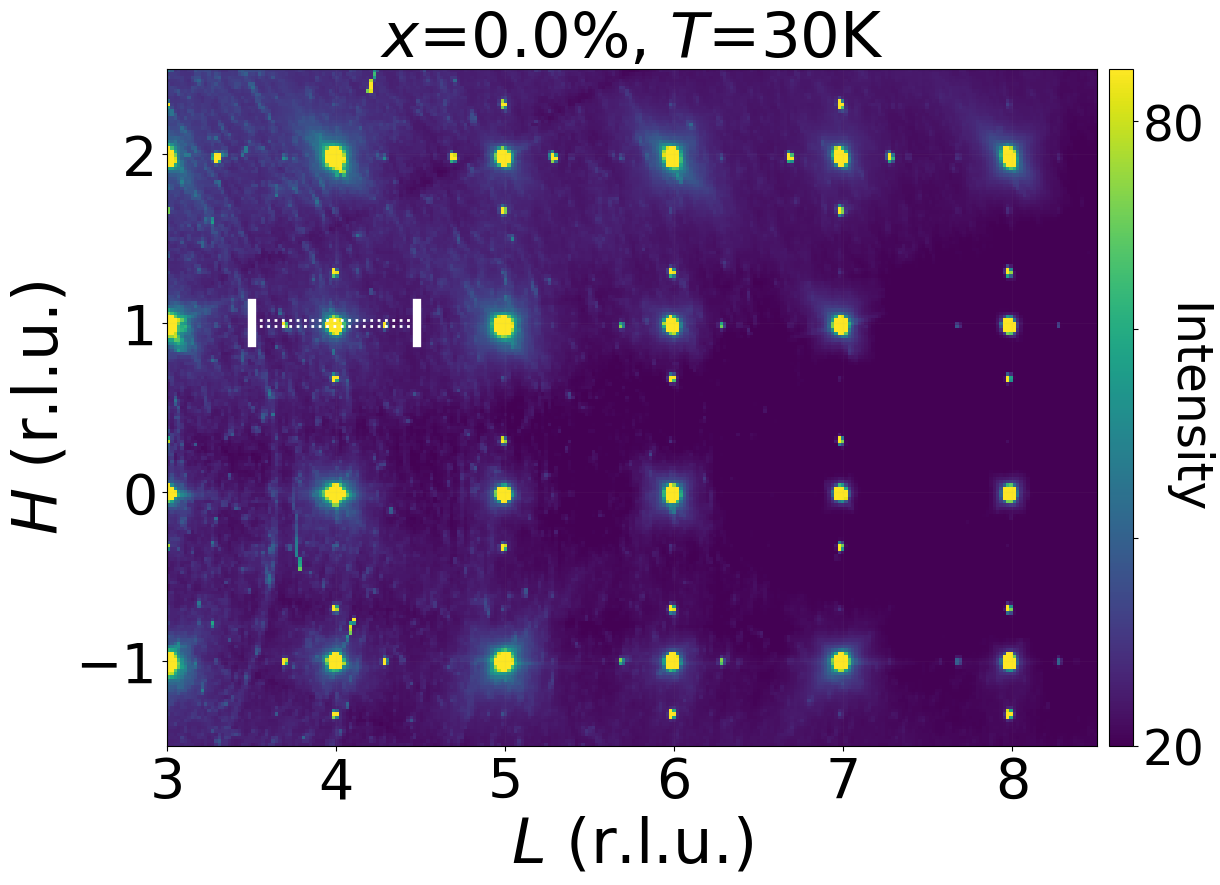

In [12]:
iT=0
plot_slice=I0[iT]




fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1)





vmx=85
vmn=20



im=plt.imshow(plot_slice[425:626,650:926],origin='lower',extent=[Ql[650], Ql[925],Qh[425], Qh[625]],vmax=vmx,vmin=vmn)
plt.grid(color='#999999', linestyle='-', alpha=0.05)



Ql_line=Ql[slice_L]
Qh_line=Qh[slice_H]
x1 = [Ql_line[0],Ql_line[-1]]
y1 = [Qh_line[0],Qh_line[0]]
x2 = [Ql_line[0],Ql_line[-1]]
y2 = [Qh_line[-1],Qh_line[-1]]

x3 = [Ql_line[0],Ql_line[0]]
y3 = [Qh_line[0]-0.1,Qh_line[-1]+0.1]
x4 = [Ql_line[-1],Ql_line[-1]]


print(x1,y1)
plt.plot(x1, y1, color="white", linewidth=2,linestyle=':')
plt.plot(x2, y2, color="white", linewidth=2,linestyle=':')
plt.plot(x3, y3, color="white", linewidth=6,linestyle='-')
plt.plot(x4, y3, color="white", linewidth=6,linestyle='-')








plt.ylabel("$H$ (r.l.u.)",size=45)
plt.xlabel("$L$ (r.l.u.)",size=45)
plt.yticks( fontsize=40)
plt.xticks( fontsize=40)

plt.yticks(np.arange(-1, 2.5, 1), fontsize=40)
plt.xticks(np.arange(3, 8.5, 1), fontsize=40)

plt.title(r'$x$=0.0%, $T$='+ str(Tlist[0])+'K',size=45)

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar=plt.colorbar(im, cax=cax,ticks=np.arange(20,81,20)) # Similar to fig.colorbar(im, cax = cax)
#cbar=plt.colorbar()
cbar.ax.set_yticklabels(['20','','','80'],size=35);  # vertically oriented colorbar
cbar.set_label('Intensity', rotation=270,size=35)
#plt.savefig('2x0_K_avg_30K.png',dpi=600)

plt.savefig(r'Diffuse_raw_0x0.svg',bbox_inches='tight',transparent='True')





In [54]:
Ql_line

array([0.98, 1.  , 1.02])

# 2. Peak Asymmetry

In [11]:




Qh_Bragg=Qh[Qh%1==0]
Ql_Bragg=Ql[Ql%1==0]



H_Bragg_ind=np.where(Qh%1==0)[0]
L_Bragg_ind=np.where(Ql%1==0)[0]



In [12]:
nT=len(Tlist)
nH=len(Qh)
nL=len(Ql)

mask_region=np.zeros((nH,nL),dtype='int')
#mask_region[426:605,675:725]=1
#mask_region[426:605,1001-725:1001-675]=1

mask_region[426:605,675:725]=1
mask_region[426:605,1001-725:1001-675]=1


In [13]:
r_in=10
r_out=20
delta=5









tile = np.zeros((nH,nL),dtype='int')
tile_direction = np.zeros((nH,nL),dtype='str')


                   
north_tile={}
south_tile={}
east_tile={}
west_tile={}



count=0

for i in range(50,nH-50,50):
    for j in range(50,nL-50,50):
        if(i+j)%100 == 50:

            north=(slice(i+r_in,i+r_out),slice(j-delta,j+delta))
            south=(slice(i-r_out,i-r_in),slice(j-delta,j+delta))
            east =(slice(i-delta,i+delta),slice(j+r_in,j+r_out))
            west =(slice(i-delta,i+delta),slice(j-r_out,j-r_in))

            if(np.min(mask_region[north]*mask_region[south]*mask_region[east]*mask_region[west])==1):
                count+=1
                north_tile[count]=north
                south_tile[count]=south
                east_tile[count]=east
                west_tile[count]=west
                
            
                tile[north]=count      
                tile[south]=count      
                tile[east]=count      
                tile[west]=count  
                
                tile_direction[north]='N'      
                tile_direction[south]='S'     
                tile_direction[east]='E'      
                tile_direction[west]='W' 
            
            

            
tile_count=count
tile_mask=tile>0


from skimage.feature import peak_local_max
# find the coordinates of local maxima
coordinates = peak_local_max(np.mean(I0[0:4],axis=0), min_distance=5)


peak_coordinates=[]
for i in coordinates:
    if(tile[i[0],i[1]])>0:
        peak_coordinates.append(i)
peak_coordinates=np.array(peak_coordinates)  



# get east west north and south peaks 
north_peak=defaultdict(lambda: False)
south_peak=defaultdict(lambda: False)
east_peak=defaultdict(lambda: False)
west_peak=defaultdict(lambda: False)




peak_id_list=[]
for i in peak_coordinates:
    peak_id=tile[i[0],i[1]]
    peak_dir = tile_direction[i[0],i[1]]
    
    if peak_dir=='N':
        north_peak[peak_id]= i
    if peak_dir=='S':
        south_peak[peak_id]= i
    if peak_dir=='E':
        east_peak[peak_id]= i
    if peak_dir=='W':
        west_peak[peak_id]= i
    
    peak_id_list.append(peak_id)
peak_id_list=set(peak_id_list)    

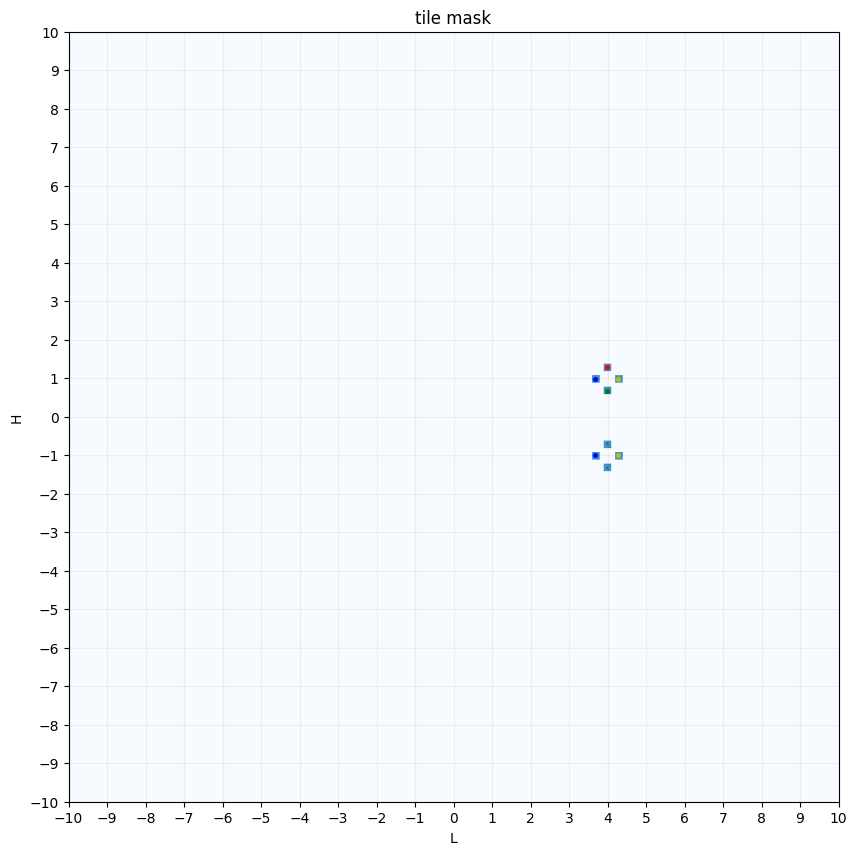

In [14]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title(('tile mask'))
ax.set_xlabel('L')
ax.set_ylabel('H')
y_major_ticks = np.array(Qh_Bragg)
x_major_ticks = np.array(Ql_Bragg)
ax.set_yticks(y_major_ticks)
ax.set_xticks(x_major_ticks)

plt.imshow(np.log(1+I0[0,:,:]*tile_mask),origin='lower',extent=[Ql[0], Ql[-1],Qh[0], Qh[-1]],cmap='Blues')
plt.grid(color='Black', linestyle='-', alpha=0.05)


for pid in peak_id_list:
    if(np.any(north_peak[pid]) and np.any(south_peak[pid])):
        plt.plot(Qh[north_peak[pid][1]], Ql[north_peak[pid][0]], 'r.',markersize=5)
        plt.plot(Qh[south_peak[pid][1]], Ql[south_peak[pid][0]], 'g.',markersize=5)
    
    if(np.any(east_peak[pid]) and np.any(west_peak[pid])):
        plt.plot(Qh[east_peak[pid][1]], Ql[east_peak[pid][0]], 'y.',markersize=5)
        plt.plot(Qh[west_peak[pid][1]], Ql[west_peak[pid][0]], 'b.',markersize=5)
    



In [15]:
def create_circular_mask(X,Y, center, radius):
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

def CDW_circular_mask(Intensity, peak_coordinates,radius=5):
    h,w = Intensity[0].shape
    X,Y = np.ogrid[:h, :w]
    CDW_mask=np.zeros((h,w))
    
    for i in peak_coordinates:
        center=i
        mask_i=create_circular_mask(X,Y,center,radius)
        CDW_mask+=mask_i
    CDW_mask=CDW_mask>0
    CDW_mask=1-CDW_mask
    return CDW_mask

In [36]:

CDW_mask=CDW_circular_mask(I0, peak_coordinates,radius=3)

I_CDW_masked=I0*CDW_mask


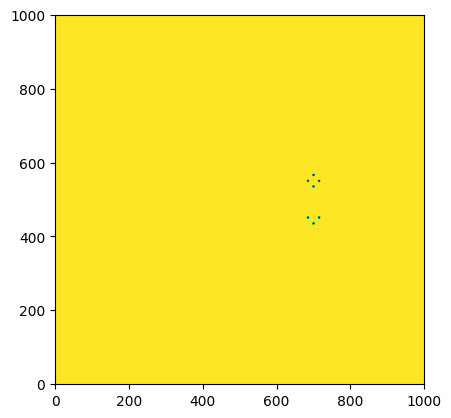

In [52]:
plt.imshow(CDW_mask,origin='lower')

In [38]:
from scipy.interpolate import griddata



In [39]:
def make_interpolated_image(im,method='linear'):
    """Make an interpolated image from the available pixels.

    Take nsamples pixels from im and reconstruct the image using
    scipy.interpolate.griddata.

    """
    
    # A meshgrid of pixel coordinates
    nx, ny = im.shape[0], im.shape[1]
    Y, X = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
    
    
    samples = im[im>0]
    (ix,iy)= np.where(im>0)
    nsamples=samples.shape[0]
    
    int_im = griddata((ix, iy), samples, (X, Y),method,rescale=True)
    return int_im

In [44]:
I_BG=[make_interpolated_image(I_CDW_masked[i]*mask_region,method='linear') for i in range(len(Tlist))]
I_BG=np.array(I_BG)

In [45]:
iT=0
slice_L=slice(549,552)
#slice_L=slice(540,560)

slice_H=slice(675,725)
#slice_L=slice(599,602)
#slice_H=slice(725,775)

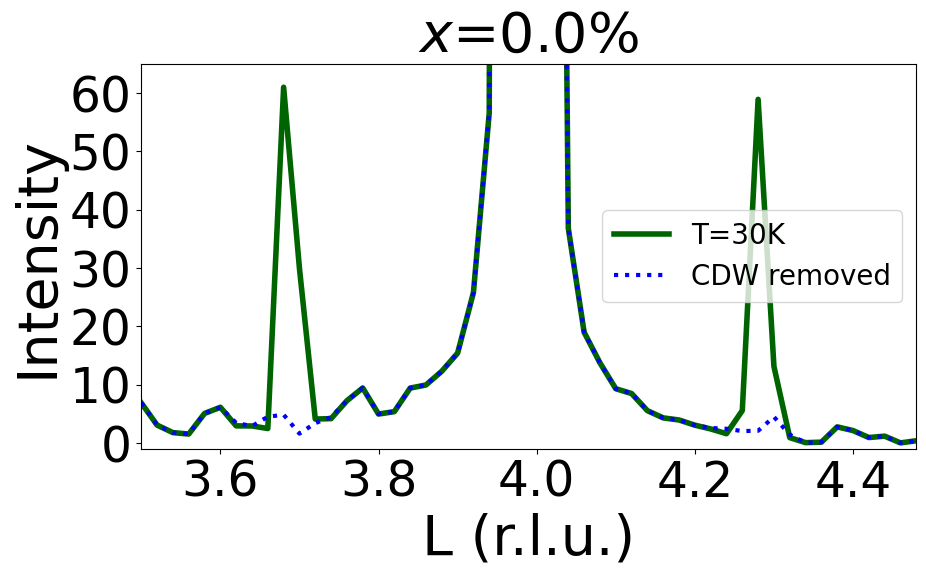

In [46]:



Linecut_I=I0[iT,slice_L,slice_H]

Intensity_line=np.mean(Linecut_I,axis=0)
Intensity_line=(Intensity_line)-np.amin(Intensity_line)


fig=plt.figure(figsize=(10,5))

plt.plot(Qh[slice_H],Intensity_line, lw=4,color='darkgreen',label='T=30K');



Linecut_I=I_BG[iT,slice_L,slice_H]

Intensity_line=np.mean(Linecut_I,axis=0)
Intensity_line=(Intensity_line)-np.amin(Intensity_line)
plt.plot(Qh[slice_H],Intensity_line, lw=3,color='blue',linestyle=':',label='CDW removed');



#plt.xlim()
plt.ylim([-1,65])
plt.xlim([Qh[slice_H][0], Qh[slice_H][-1]])
plt.xlabel(r'L (r.l.u.)',fontsize=40)
plt.ylabel(r'Intensity',fontsize=40)
plt.title(r'$x$=0.0%',fontsize=40)
#plt.legend(fontsize=20)
plt.xticks(size=35)
plt.yticks(size=35)
plt.legend(fontsize=20)
#plt.savefig('2x0_K_avg_line_cut_Intensity.png',dpi=600)


#plt.yscale('log')

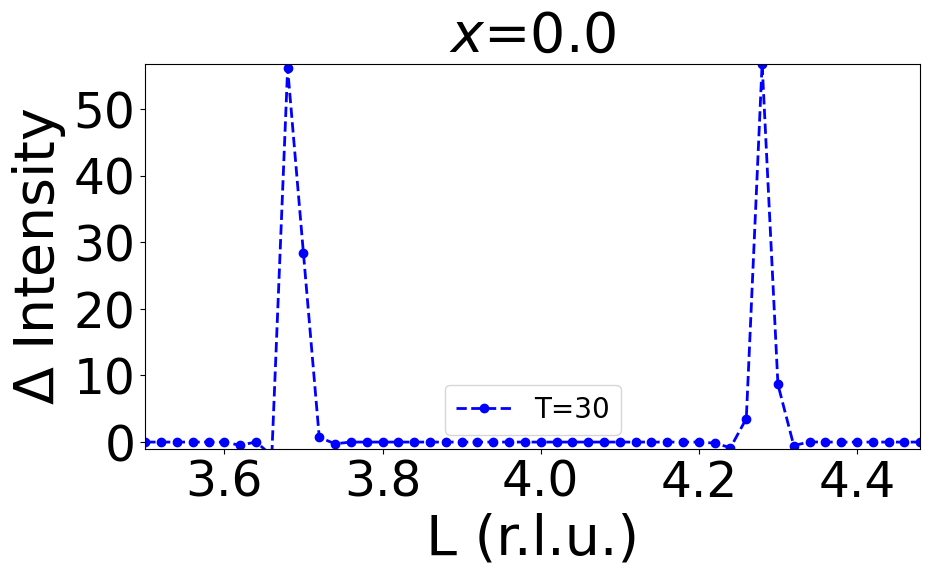

In [47]:
iT=0

Linecut_I=I0[iT,slice_L,slice_H]

Intensity_line=np.mean(Linecut_I,axis=0)

Linecut_BG=I_BG[iT,slice_L,slice_H]

Intensity_BG=np.mean(Linecut_BG,axis=0)
Intensity_line=(Intensity_line-Intensity_BG)

norm=np.max(Intensity_line)
fig=plt.figure(figsize=(10,5))

plt.plot(Qh[slice_H],Intensity_line, lw=2,color='blue',linestyle='--',label='T='+str(Tlist[iT]),marker='o');


#plt.xlim()
plt.ylim([-1,np.max(Intensity_line)])
plt.xlim([Qh[slice_H][0], Qh[slice_H][-1]])
plt.xlabel(r'L (r.l.u.)',fontsize=40)
plt.ylabel(r'$\Delta$ Intensity',fontsize=40)
plt.title(r'$x$=0.0',fontsize=40)
#plt.legend(fontsize=20)
plt.xticks(size=35)
plt.yticks(size=35)
plt.legend(fontsize=20)
#plt.savefig('2x0_K_avg_line_cut_Intensity.png',dpi=600)


#plt.yscale('log')

# Peak avg asymmetry

In [48]:
delta_I=I0-I_BG
delta_I[delta_I<0]=0
delta=5

    
asym_EW=[]
for pid in peak_id_list:
    if(np.any(east_peak[pid])and np.any(west_peak[pid])):
        E_center=east_peak[pid]
        W_center=west_peak[pid]
        a1=delta_I[:,E_center[0]-delta:E_center[0]+delta+1,E_center[1]-delta:E_center[1]+delta+1]
        a2=delta_I[:,W_center[0]-delta:W_center[0]+delta+1,W_center[1]-delta:W_center[1]+delta+1]
        
        
        print('East',Qh[E_center[0]-delta:E_center[0]+delta+1], Ql[E_center[1]-delta:E_center[1]+delta+1])
        print('West',Qh[W_center[0]-delta:W_center[0]+delta+1], Ql[W_center[1]-delta:W_center[1]+delta+1])

        
        a1=np.sum(a1,axis=(1,2))
        a2=np.sum(a2,axis=(1,2))
        
        asym=(a2-a1)/(0.5*(a1+a2))
        asym[(a1<=5)|(a2<=5)] = None
        
        asym_EW.append(asym)


East [-1.1  -1.08 -1.06 -1.04 -1.02 -1.   -0.98 -0.96 -0.94 -0.92 -0.9 ] [4.18 4.2  4.22 4.24 4.26 4.28 4.3  4.32 4.34 4.36 4.38]
West [-1.1  -1.08 -1.06 -1.04 -1.02 -1.   -0.98 -0.96 -0.94 -0.92 -0.9 ] [3.58 3.6  3.62 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78]
East [0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08] [4.18 4.2  4.22 4.24 4.26 4.28 4.3  4.32 4.34 4.36 4.38]
West [0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08] [3.58 3.6  3.62 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78]


Text(0.5, 1.0, 'x=0%')

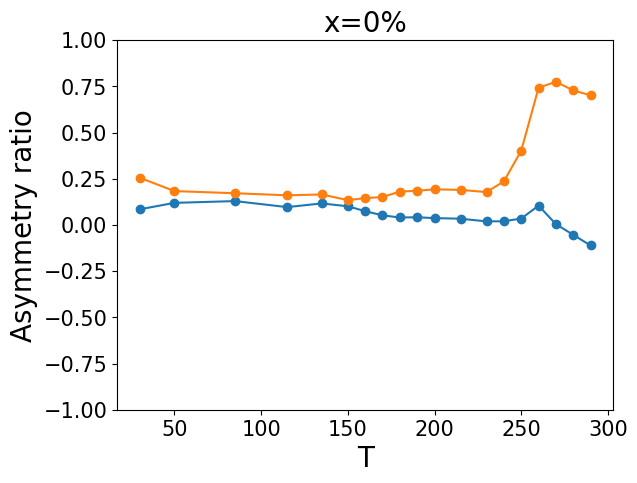

In [49]:
plt.plot(Tlist,np.array(asym_EW).transpose(),marker='o')
plt.ylim([-1,1])
plt.xlabel('T',size=20)
plt.ylabel('Asymmetry ratio',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('x=0%',size=20)

Text(0.5, 1.0, 'x=0.0%')

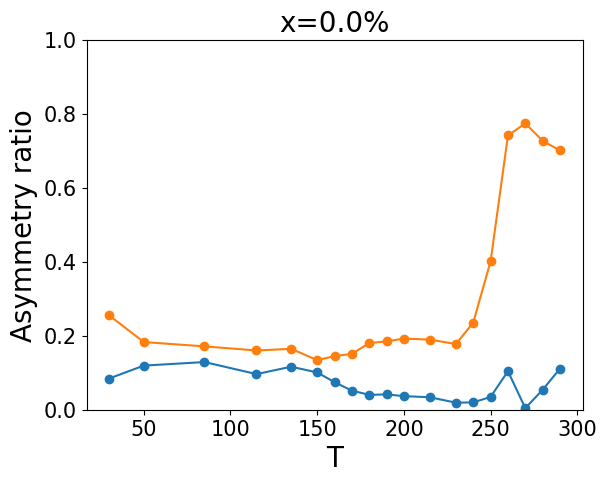

In [50]:
plt.plot(Tlist,np.abs(np.array(asym_EW)).transpose(),marker='o')
plt.ylim([0,1])
plt.xlabel('T',size=20)
plt.ylabel('Asymmetry ratio',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('x=0.0%',size=20)

Text(0.5, 1.0, 'x=0.0%')

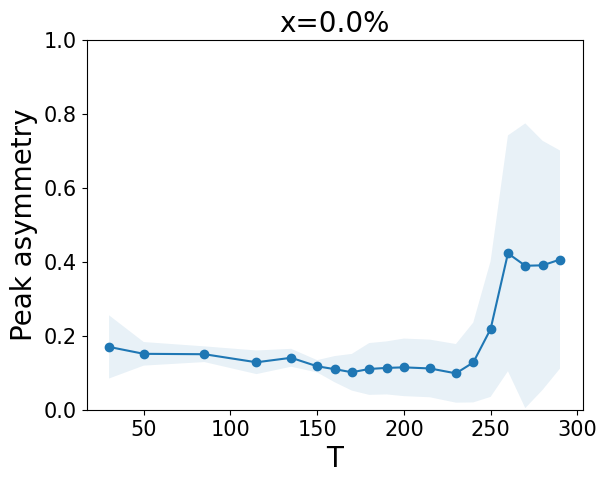

In [51]:
y=np.abs(np.array(asym_EW)).transpose()
y_mean=np.mean(y,axis=1)
y_std=np.std(y,axis=1)
plt.plot(Tlist,y_mean,marker='o')
plt.gca().fill_between(Tlist,y_mean-y_std,y_mean+y_std,alpha=0.1)
plt.ylim([0,1])
plt.xlabel('T',size=20)
plt.ylabel('Peak asymmetry',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('x=0.0%',size=20)